## CUSTOMER ANALYTICS 

In [289]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn import preprocessing 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [290]:
data = pd.read_csv("training data.csv")

In [349]:
data.head(5)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\seaborn\categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


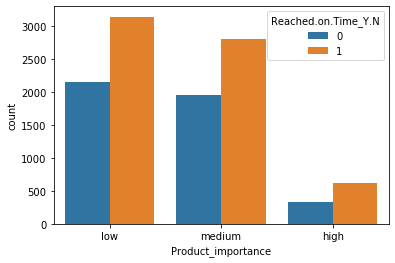

In [292]:
sns.countplot(x = "Product_importance", hue = "Reached.on.Time_Y.N", data = data)

#### DATA TRANSFORMATION USING LABEL ENCODING


In [293]:
data_t = data.copy()
le = LabelEncoder()
data_t["Warehouse_block"] = le.fit_transform(data_t["Warehouse_block"])
data_t["Mode_of_Shipment"] = le.fit_transform(data_t["Mode_of_Shipment"])
# data["Customer_rating"] = le.fit_transform(data["Customer_rating"])
data_t["Product_importance"] = le.fit_transform(data_t["Product_importance"])
data_t["Gender"] = le.fit_transform(data_t["Gender"])


In [294]:
data_t.head(5)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,3,0,4,2,177,3,1,0,44,1233,1
1,2,4,0,4,5,216,2,1,1,59,3088,1
2,3,0,0,2,2,183,4,1,1,48,3374,1
3,4,1,0,3,3,176,4,2,1,10,1177,1
4,5,2,0,2,2,184,3,2,0,46,2484,1


#### PAIRPLOT

In [295]:
# sns.pairplot(data)

They also want to know, if their shipments are reaching on time to their best customers who have a :
1. Good customer rating.
2. Good customer score.
3. Make recurring orders.
4. Highest payment buyers

#### SHIPMENTS REACHING ON TIME OR NOT : BASED ON PRIOR PURCHASES

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\seaborn\categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


Text(0.5, 1.0, 'Distribution of Customers based on Proior Purchases')

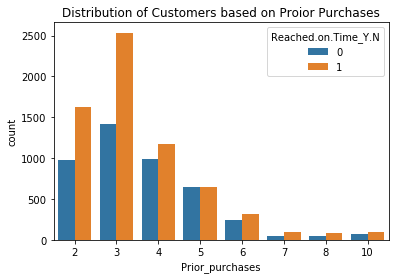

In [296]:
sns.countplot(x = "Prior_purchases", hue = "Reached.on.Time_Y.N", data = data).set_title('Distribution of Customers based on Proior Purchases')

#### SHIPMENTS REACHING ON TIME OR NOT : BASED ON CUSTOMER RATING

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\seaborn\categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


Text(0.5, 1.0, 'On time delivery distribution 0:Yes, 1:No')

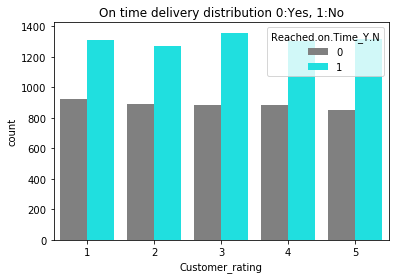

In [297]:
sns.countplot(x = "Customer_rating", hue = "Reached.on.Time_Y.N", data = data, palette = ["Grey","Cyan"]).set_title("On time delivery distribution 0:Yes, 1:No")

#### Count of highest paying Customers

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


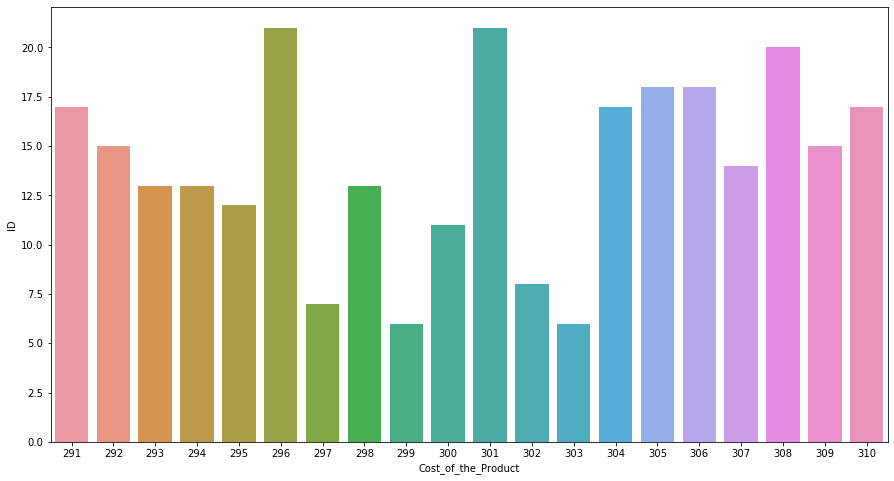

In [298]:
count = data.groupby("Cost_of_the_Product").count().sort_index(ascending = False)
plt.figure(figsize=(15,8))
ax = sns.barplot(count.index[:20], count.ID.head(20))

#### Tabular View of the Number Customers getting on on-time delivery, grouped by the spend amount. 

In [299]:
ontime = data.groupby("Cost_of_the_Product").apply(lambda x: (x.groupby("Reached.on.Time_Y.N").count()))
ontime = ontime.reset_index(level = [1])
ontime = ontime.sort_index(ascending = False)
ontime

,Reached.on.Time_Y.N,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms
Cost_of_the_Product,,,,,,,,,,,,
310,1,7,7,7,7,7,7,7,7,7,7,7
310,0,10,10,10,10,10,10,10,10,10,10,10
309,1,7,7,7,7,7,7,7,7,7,7,7
309,0,8,8,8,8,8,8,8,8,8,8,8
308,1,9,9,9,9,9,9,9,9,9,9,9
308,0,11,11,11,11,11,11,11,11,11,11,11
307,1,5,5,5,5,5,5,5,5,5,5,5
307,0,9,9,9,9,9,9,9,9,9,9,9
306,1,9,9,9,9,9,9,9,9,9,9,9


#### SHIPMENTS REACHING ON TIME OR NOT : BASED ON PRODUCT IMPORTANCE

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\seaborn\categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


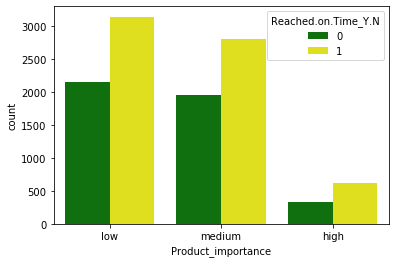

In [300]:
sns.countplot(x = "Product_importance", hue = "Reached.on.Time_Y.N", data = data, palette = ["Green","Yellow"])

#### Understanding the Correlation of Features with the Target Variable

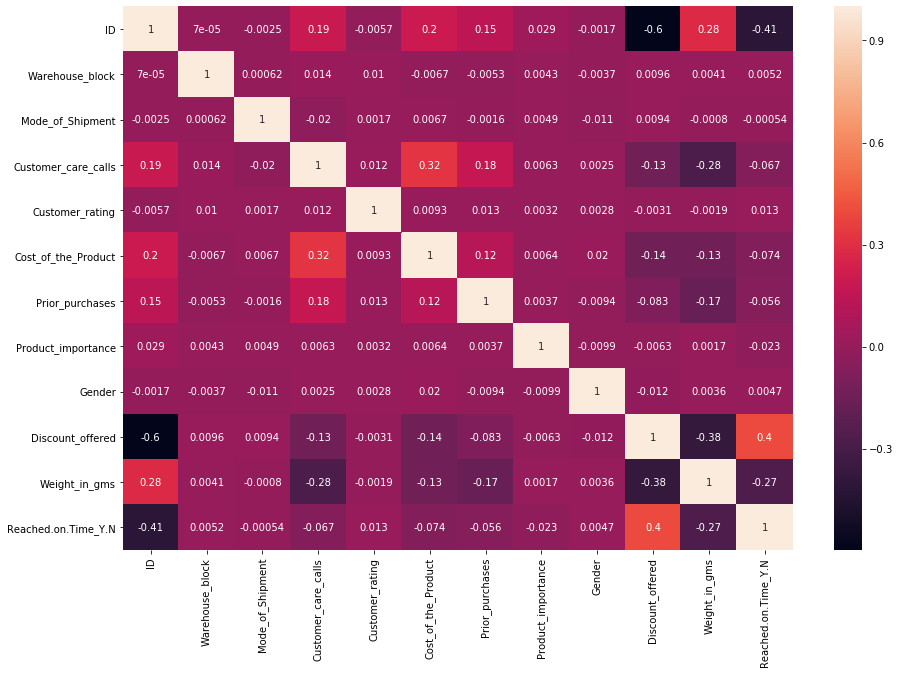

In [306]:
corrMatrix = data_t.corr()
plt.show()
plt.figure(figsize=(15,10))
ax = sns.heatmap(corrMatrix, annot=True)

#### MODELS FOR PREDICTION : USING VALIDATION SET APPROACH

In [393]:
X = data_t.drop(labels = ["Reached.on.Time_Y.N", "ID"], axis = 1)
Y = data_t["Reached.on.Time_Y.N"]
train_x, test_x, train_y, test_y = train_test_split(X,Y, test_size = 0.20)
train_x.shape, test_x.shape, train_y.shape, test_y.shape

((8799, 10), (2200, 10), (8799,), (2200,))

#### SCALING OF FEATURES  (TREES ARE NOT AFFECTED BY SCALING)

In [308]:
X_scaled = preprocessing.scale(X)
train_x_scaled, test_x_scaled, train_y, test_y = train_test_split(X_scaled, Y, test_size = 0.20)

#### LOGISTIC REGRESSION RESULTS ON UNSCALLED DATA

In [309]:
# clf1 = LogisticRegression(penalty = 'l1', C=100, solver = 'liblinear')
# clf1.fit(train_x, train_y)
# pred1 = clf1.predict(test_x)
# print("Accuracy using Logistic Regression:", clf1.score(test_x, test_y))  
# print("F1 Score:", f1_score(test_y, pred1))

#### LOGISTIC REGRESSION RESULTS ON SCALED DATA

Accuracy using Logistic Regression: 0.6368181818181818
F1 Score: 0.6925740669488264


Text(0.5, 0, 'False Positive Rate')

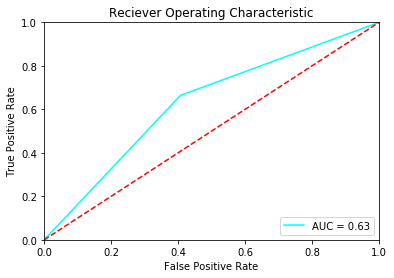

In [310]:
clf1scaled = LogisticRegression(penalty = 'l2', C=1)
clf1scaled.fit(train_x_scaled, train_y)
pred1scaled = clf1scaled.predict(test_x_scaled)
print("Accuracy using Logistic Regression:", clf1scaled.score(test_x_scaled, test_y))  
print("F1 Score:", f1_score(test_y, pred1scaled))

false_positive_rate,true_positive_rate, thresholds = roc_curve(test_y, pred1scaled)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.title('Reciever Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, color='cyan', label=f'AUC = {round(roc_auc, 2)}')
plt.legend(loc= 'lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

#### SVM RESULTS

In [311]:
# clf2 = SVC()
# clf2.fit(train_x, train_y)
# pred2 = clf2.predict(test_x)
# print("Accuracy using SVM:", np.average(pred2==test_y))
# print("F1 Score:", f1_score(test_y, pred2))

#### SVM RESULTS ON SCALED DATA

Accuracy using SVM: 0.65
F1 Score: 0.6844262295081966


Text(0.5, 0, 'False Positive Rate')

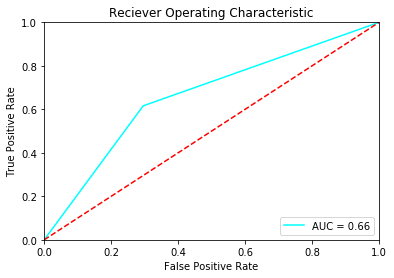

In [312]:
clf2_scaled = SVC(kernel = 'poly', C = 0.1)
clf2_scaled.fit(train_x_scaled, train_y)
pred2_scaled = clf2_scaled.predict(test_x_scaled)
print("Accuracy using SVM:", np.average(pred2_scaled==test_y))
print("F1 Score:", f1_score(test_y, pred2_scaled))

false_positive_rate,true_positive_rate, thresholds = roc_curve(test_y, pred2_scaled)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.title('Reciever Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, color='cyan', label=f'AUC = {round(roc_auc, 2)}')
plt.legend(loc= 'lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

#### RANDOM FOREST RESULTS

In [313]:
# clf3 = RandomForestClassifier()
# clf3.fit(train_x, train_y)
# pred3 = clf3.predict(test_x)
# print("Accuacy using Random Forest:", np.average(pred3==test_y))
# print("F1 Score:", f1_score(test_y, pred3))

#### RANDOM FOREST RESULTS WITH SCALED DATA

Accuacy using Random Forest: 0.65
F1 Score: 0.6799667497921862


Text(0.5, 0, 'False Positive Rate')

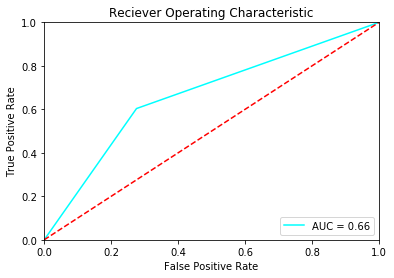

In [314]:
clf3_scaled = RandomForestClassifier(n_estimators = 300, n_jobs = -1)
clf3_scaled.fit(train_x_scaled, train_y)
pred3_scaled = clf3_scaled.predict(test_x_scaled)
print("Accuacy using Random Forest:", clf3_scaled.score(test_x_scaled, test_y))#np.average(pred3_scaled==test_y))
print("F1 Score:", f1_score(test_y, pred3_scaled))

false_positive_rate,true_positive_rate, thresholds = roc_curve(test_y, pred3_scaled)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.title('Reciever Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, color='cyan', label=f'AUC = {round(roc_auc, 2)}')
plt.legend(loc= 'lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

#### EXTRA TREES CLASSIFIER

In [315]:
# clf4 = ExtraTreesClassifier()
# clf4.fit(train_x, train_y)
# pred4 = clf4.predict(test_x)
# print("Accuracy using Trees Classifier:", np.average(pred4==test_y))
# print("F1 Score:", f1_score(test_y, pred4))

Accuracy using Trees Classifier: 0.6481818181818182
F1 Score: 0.6899038461538461


Text(0.5, 0, 'False Positive Rate')

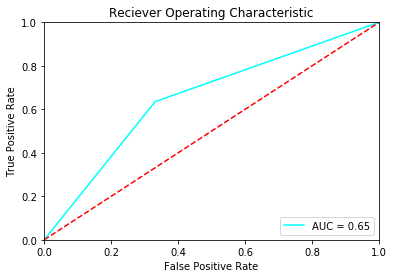

In [316]:
clf4_scaled = ExtraTreesClassifier()
clf4_scaled.fit(train_x_scaled, train_y)
pred4_scaled = clf4_scaled.predict(test_x_scaled)
print("Accuracy using Trees Classifier:", np.average(pred4_scaled==test_y))
print("F1 Score:", f1_score(test_y, pred4_scaled))

false_positive_rate,true_positive_rate, thresholds = roc_curve(test_y, pred4_scaled)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.title('Reciever Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, color='cyan', label=f'AUC = {round(roc_auc, 2)}')
plt.legend(loc= 'lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

#### IDENTIFYING IMPORTANT FEATURES

In [317]:
print("Feature Importance Scores:", clf3_scaled.feature_importances_)

Feature Importance Scores: [0.05789171 0.03222427 0.05281336 0.05745829 0.17432736 0.05795351
 0.03133257 0.02341104 0.22746049 0.2851274 ]


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

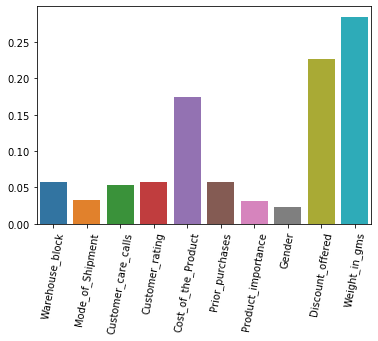

In [318]:
sns.barplot(X.columns, clf3_scaled.feature_importances_)
plt.xticks(rotation = 80)

##### Since feature_importances gives preference to high cardinality features, ID column is also considered as a feature of importance in our model which seems illogical as ID's are nothing but unique numbers used to identify the customers.

In [319]:
from sklearn.feature_selection import RFE
selector = RFE(clf4, step = 1)
selector = selector.fit(train_x, train_y)
# print(selector.support_)
# print(selector.ranking_)

for i in range(len(selector.ranking_)):
    if selector.ranking_[i] ==1:
        print ("Selected Features:", X.columns[i])

Selected Features: Warehouse_block
Selected Features: Cost_of_the_Product
Selected Features: Prior_purchases
Selected Features: Discount_offered
Selected Features: Weight_in_gms


#### Using Grid Search Cross Validation to Select the Best Model

In [215]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [231]:
# Create a pipeline
pipe = Pipeline([('classifier', RandomForestClassifier())])

# Create space of candidate learning algorithms and their hyperparameters
search_space = [{'classifier': [LogisticRegression()],
                 'classifier__penalty': ['l2'],
                 'classifier__C': np.logspace(0, 4, 10)},
                {'classifier': [RandomForestClassifier()],
                 'classifier__n_estimators': [10, 100, 1000],
                 'classifier__max_features': [1, 2, 3]},
                {'classifier': [ExtraTreesClassifier()],
                 'classifier__n_estimators': [10, 100, 1000],
                 'classifier__max_features': [1, 2, 3]}]

In [232]:
clf_gs = GridSearchCV(pipe, search_space, cv=5, verbose=0)

In [233]:
best_model = clf_gs.fit(train_x_scaled, train_y)

In [234]:
best_model.best_estimator_.get_params()['classifier']

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=2,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [236]:
predict_gs = best_model.predict(test_x_scaled)

Accuracy:  0.6677272727272727


Text(0.5, 0, 'False Positive Rate')

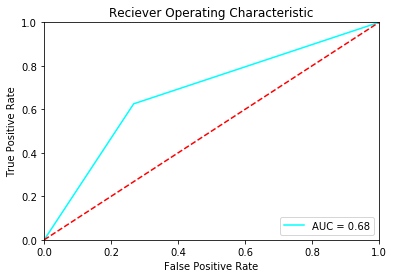

In [238]:
print("Accuracy: ", best_model.score(test_x_scaled, test_y))
false_positive_rate,true_positive_rate, thresholds = roc_curve(test_y, predict_gs)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.title('Reciever Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, color='cyan', label=f'AUC = {round(roc_auc, 2)}')
plt.legend(loc= 'lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

#### CUSTOMER SEGMENTATION

In [322]:
segmentation = data[data_t["Reached.on.Time_Y.N"] == 1]
segmentation.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


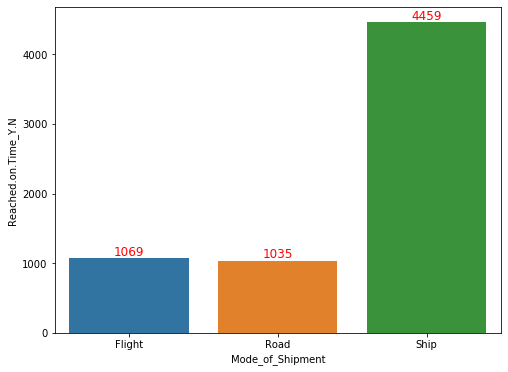

In [333]:
ship = segmentation.groupby("Mode_of_Shipment").count()
plt.figure(figsize=(8,6))
g = sns.barplot(ship.index, "Reached.on.Time_Y.N", data = ship)
ax = plt.gca()

for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='red', ha='center', va='bottom')

#### Products delivered via Ships are reaching late compared to Road and Flight Logistics. 

Potential Solutions:
1. Deliver products via road if it is economically viable.
2. Negotiate contracts with airlines to reduce freight charges so that deliveries could be made on-time with less amount spent on logistics.

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


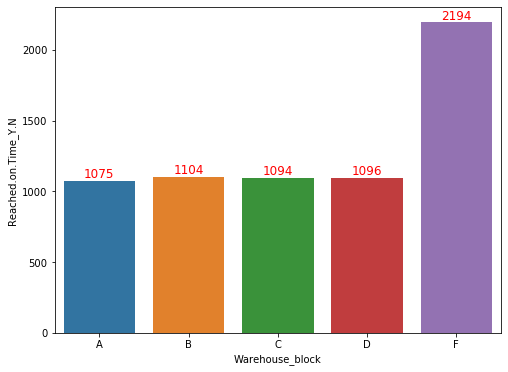

In [334]:
warehouse = segmentation.groupby("Warehouse_block").count()
plt.figure(figsize=(8,6))
g = sns.barplot(warehouse.index, "Reached.on.Time_Y.N", data = warehouse)
ax = plt.gca()

for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='red', ha='center', va='bottom')

#### Warehouse F has the highest late delivery records.

Potential Solutions:
1. Focus on improving the service levels of Warehouse F by allocating more delivery trucks or other way of shipments. 
2. This high number may also mean Warehouse F is located away from customer's delivery locations. Hence, satisfying customer orders from other warehouses can improve the overall on-time delivery.

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


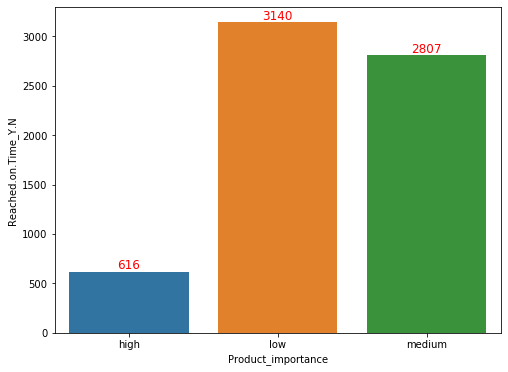

In [335]:
importance = segmentation.groupby("Product_importance").count()
plt.figure(figsize=(8,6))
g = sns.barplot(importance.index, "Reached.on.Time_Y.N", data = importance)
ax = plt.gca()

for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='red', ha='center', va='bottom')

#### Products with high importance are also delivered late.

Potential Soultuions:
1. High priority or high importance products could be delivered by flight and customers may be charged accordingly.
2. For high priority products, the company may get into contract agreement with logistic companies who can ensure on-time delivery of products on ad-hoc basis at cheaper rates and share some percentage of revenue generated out of these orders with them. These type of contracts are called Revenue Sharing Contracts and are common in the retail industry.

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


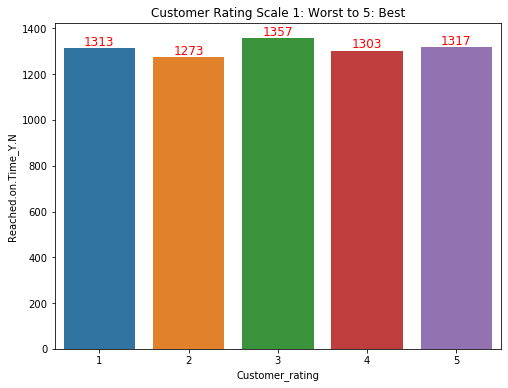

In [337]:
rating = segmentation.groupby("Customer_rating").count()
plt.figure(figsize=(8,6))
g = sns.barplot(rating.index, "Reached.on.Time_Y.N", data = rating).set_title("Customer Rating Scale 1: Worst to 5: Best")
ax = plt.gca()

for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='red', ha='center', va='bottom')

#### Products are delivered late, even to customers with high ratings

Potential Solution:
1. Products need to reach on time to high rated customers to keep them loyal. Special Delivery arrangements should be made (like one-day or same day delivery) to regain their trust.

In [379]:
percentage = len(data["Reached.on.Time_Y.N"])
print("Percentage of Late Orders: ", round(len(data[data["Reached.on.Time_Y.N"] == 1]) / len(data["Reached.on.Time_Y.N"]), 3))
print("Percentage of on-time Orders: ", round(len(data[data["Reached.on.Time_Y.N"] == 0]) / len(data["Reached.on.Time_Y.N"]), 3))

Percentage of Late Orders:  0.597
Percentage of on-time Orders:  0.403


In [408]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

#### Clustering without Scaling

In [395]:
clusters_5 = KMeans(n_clusters = 5)
clusters_y_5 = clusters_5.fit_predict(X)
print(clusters_5.cluster_centers_)

[[2.35670465e+00 1.51358457e+00 3.83172656e+00 2.99824715e+00
  2.28360210e+02 3.31814198e+00 1.35144610e+00 4.89921122e-01
  3.29614373e+01 2.81378528e+03]
 [2.34513274e+00 1.49955752e+00 3.85265487e+00 2.96150442e+00
  2.03330088e+02 3.36769912e+00 1.35000000e+00 4.97787611e-01
  5.57477876e+00 4.86068938e+03]
 [2.32705882e+00 1.52647059e+00 4.59117647e+00 2.97911765e+00
  2.15175294e+02 4.01558824e+00 1.34147059e+00 4.91470588e-01
  1.76667647e+01 1.52057941e+03]
 [2.31813627e+00 1.49198397e+00 3.77555110e+00 3.05010020e+00
  2.08466433e+02 3.37474950e+00 1.35320641e+00 5.05010020e-01
  1.22975952e+01 4.11650251e+03]
 [2.33287920e+00 1.54405086e+00 3.80108992e+00 2.98001817e+00
  2.01714351e+02 3.38510445e+00 1.33969119e+00 4.95458674e-01
  5.57266122e+00 5.62595550e+03]]


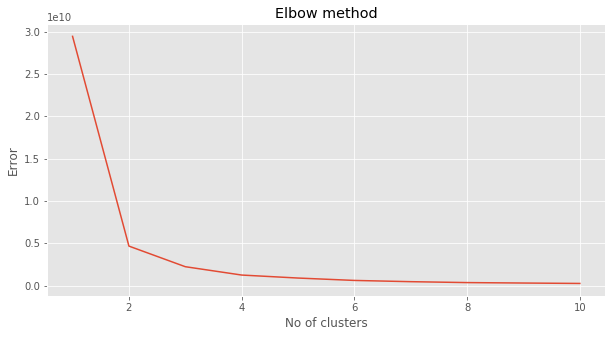

In [387]:
Error =[]
for i in range(1, 11):
    clusters_5 = KMeans(n_clusters = i).fit(X)
    clusters_5.fit(X)
    Error.append(clusters_5.inertia_)

    
plt.rcParams['figure.figsize'] = (10, 5)
plt.style.use('ggplot')
plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

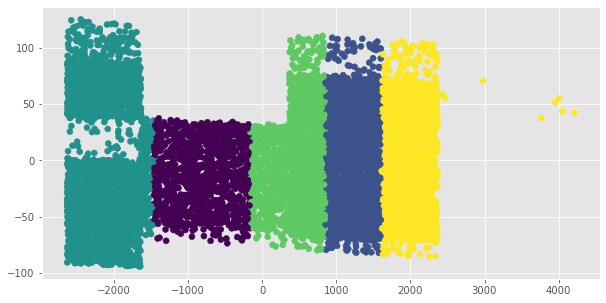

In [415]:
pca = PCA(n_components=2).fit(X)
pca_2d = pca.transform(X)
plt.figure('Reference Plot')
plt.scatter(pca_2d[:, 0], pca_2d[:, 1], c=clusters_y_5)

#### Retraining our model with k = 3

In [397]:
clusters_3 = KMeans(n_clusters = 3)
clusters_y_3 = clusters_3.fit_predict(X)
print(clusters_3.cluster_centers_)

[[2.32013716e+00 1.49532419e+00 3.80268080e+00 3.02524938e+00
  2.09880923e+02 3.38466334e+00 1.35879052e+00 5.03117207e-01
  1.42288030e+01 4.06930268e+03]
 [2.33308476e+00 1.52249565e+00 4.47402436e+00 2.98931146e+00
  2.17472036e+02 3.90753169e+00 1.34302759e+00 4.90181457e-01
  1.99865772e+01 1.67466518e+03]
 [2.34501062e+00 1.52919321e+00 3.82085987e+00 2.96231423e+00
  2.02698248e+02 3.36040340e+00 1.33837580e+00 4.95753715e-01
  5.58386412e+00 5.35537394e+03]]


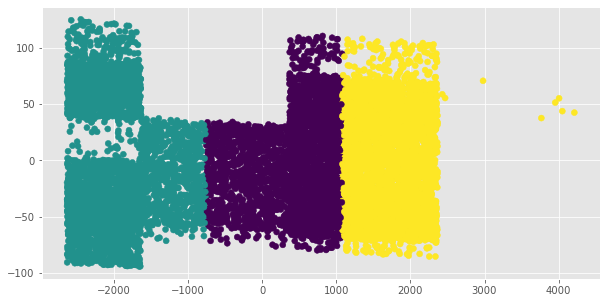

In [399]:
pca = PCA(n_components=2).fit(X)
pca_2d = pca.transform(X)
plt.figure('Reference Plot')
plt.scatter(pca_2d[:, 0], pca_2d[:, 1], c=clusters_y_3)

#### Clustering with Scaling

In [411]:
clusters_5_scaled = KMeans(n_clusters = 5)
clusters_y_5_scaled = clusters_5_scaled.fit_predict(X_scaled)
print(clusters_5_scaled.cluster_centers_)

[[ 1.97932214e-02  1.27420423e-01 -3.35318377e-01 -1.09108476e-02
  -4.29257543e-01 -2.78617612e-01 -5.12323409e-02 -3.66169031e-02
   1.96414234e+00 -8.72866583e-01]
 [-1.10185551e-02  3.90166783e-01 -2.67122913e-01 -2.37628935e-02
  -1.54769432e-01 -2.55460512e-01 -4.89859685e-03  1.00830799e+00
  -4.25760708e-01  5.96287249e-01]
 [-1.14861921e-02 -2.00415767e+00 -1.90937325e-01 -8.98377197e-03
  -1.69024427e-01 -1.38955468e-01 -1.80943723e-02  6.55713692e-02
  -2.87078971e-01  3.90058215e-01]
 [-3.00719022e-03  7.62364343e-02  1.11532966e+00  4.48769231e-02
   9.34126040e-01  9.62572968e-01  3.66420139e-02 -1.45998474e-02
  -3.83552832e-01 -1.07078533e+00]
 [ 5.62047652e-03  3.95369322e-01 -2.87372538e-01  2.21678787e-04
  -2.08154879e-01 -2.42274380e-01  1.83138696e-02 -9.91760464e-01
  -4.29202874e-01  6.21630582e-01]]


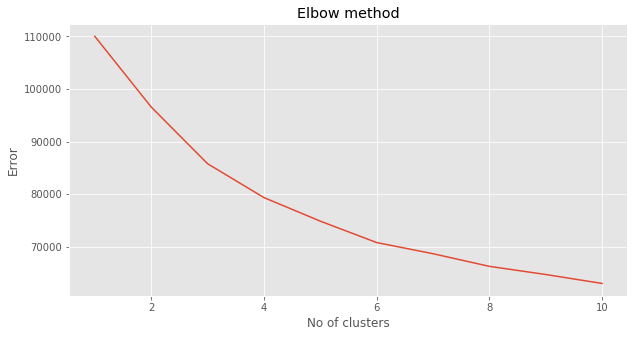

In [412]:
Error =[]
for i in range(1, 11):
    clusters_5_scaled = KMeans(n_clusters = i).fit(X)
    clusters_5_scaled.fit(X_scaled)
    Error.append(clusters_5_scaled.inertia_)

    
plt.rcParams['figure.figsize'] = (10, 5)
plt.style.use('ggplot')
plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

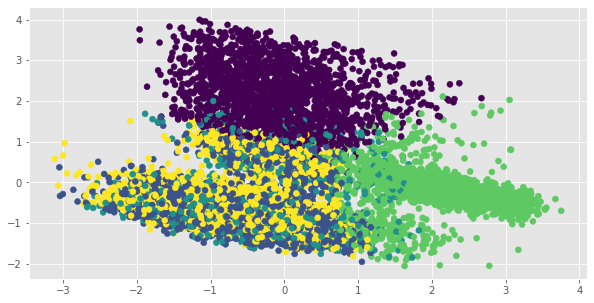

In [413]:
pca = PCA(n_components=2).fit(X_scaled)
pca_2d = pca.transform(X_scaled)
plt.figure('Reference Plot')
plt.scatter(pca_2d[:, 0], pca_2d[:, 1], c=clusters_y_5_scaled)

In [404]:
from mpl_toolkits.mplot3d import Axes3D

In [407]:
import matplotlib.animation as animation

In [418]:
from sklearn.compose import make_column_transformer

In [426]:
# num_scaled = ColumnTransformer([('scale', StandardScaler(), make_column_selector(dtype_include=np.number)), (remainder='passthrough')])
# ct.fit_transform(X_scaled)